# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library


In [2]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')  # Example ticker, you can change it to any stock ticker
df=data
df.head() # Display the first few rows of the dataset

C:\Users\RISHI\AppData\Local\Temp\ipykernel_10692\2158140052.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431896,6.446623,6.382908,6.414465,493729600
1,2010-01-05,6.443016,6.479381,6.409054,6.449628,601904800
2,2010-01-06,6.340533,6.468564,6.333921,6.443018,552160000
3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,2010-01-08,6.370885,6.371487,6.283128,6.320394,447610800


In [4]:
df = df.drop(['Date'], axis = 1)
df.head()

C:\Users\RISHI\AppData\Local\Temp\ipykernel_10692\3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431896,6.446623,6.382908,6.414465,493729600
1,6.443016,6.479381,6.409054,6.449628,601904800
2,6.340533,6.468564,6.333921,6.443018,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370885,6.371487,6.283128,6.320394,447610800


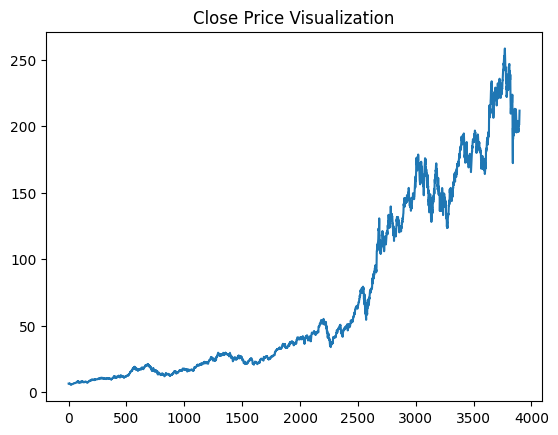

In [5]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431896,6.446623,6.382908,6.414465,493729600
1,6.443016,6.479381,6.409054,6.449628,601904800
2,6.340533,6.468564,6.333921,6.443018,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370885,6.371487,6.283128,6.320394,447610800
...,...,...,...,...,...
3893,201.000000,202.639999,199.460007,201.429993,50799100
3894,201.080002,203.220001,200.000000,201.889999,73188600
3895,205.169998,207.389999,199.259995,202.009995,91912800


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3893,213.024570
3894,212.760757
3895,212.490059
3896,212.249153


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

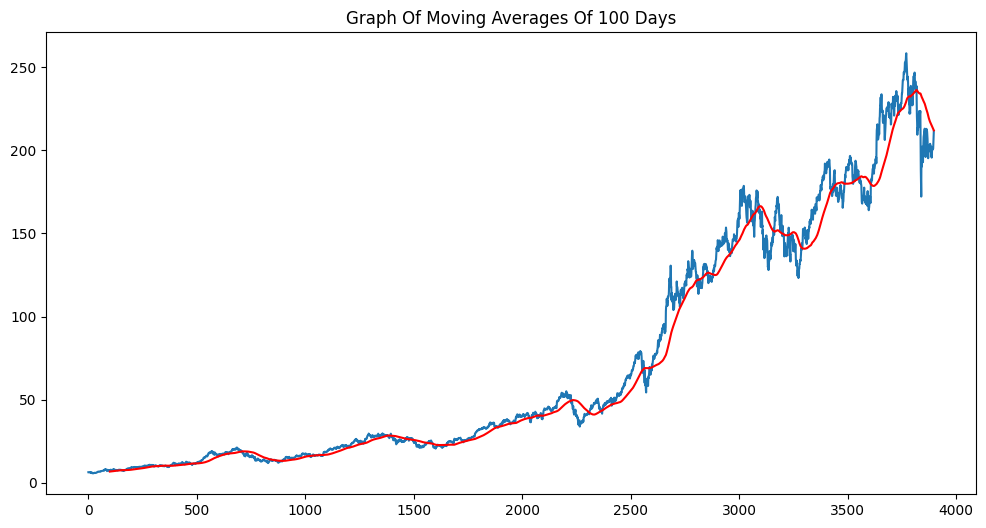

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3893,222.993161
3894,222.897880
3895,222.827035
3896,222.756735


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

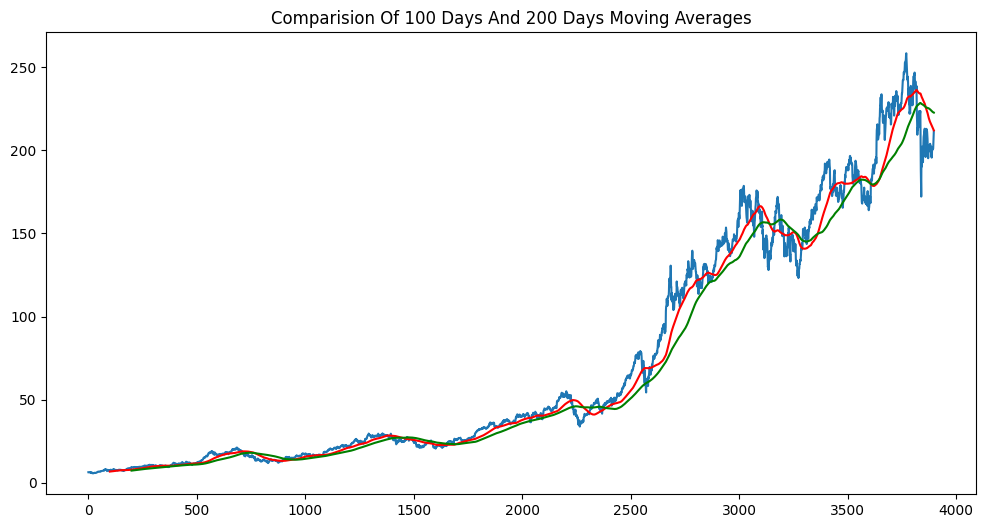

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3898, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2728, 6)
(1170, 6)


In [13]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431896,6.446623,6.382908,6.414465,493729600
1,2010-01-05,6.443016,6.479381,6.409054,6.449628,601904800
2,2010-01-06,6.340533,6.468564,6.333921,6.443018,552160000
3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,2010-01-08,6.370885,6.371487,6.283128,6.320394,447610800


In [14]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
2728,2020-11-03,107.548882,108.571390,105.883647,106.789302,107624400
2729,2020-11-04,111.940811,112.564057,109.408876,111.152018,138235500
2730,2020-11-05,115.913994,116.488552,113.810543,114.862265,126387100
2731,2020-11-06,115.782318,116.279819,113.285028,115.421380,114457900
2732,2020-11-09,113.470360,119.001453,113.206978,117.547957,154515300


# Using MinMax scaler for normalization of the dataset

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00493688],
       [0.00521115],
       [0.00515959],
       ...,
       [0.80843571],
       [0.79848541],
       [0.78367372]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(2628, 100, 1)

# ML Model (LSTM)

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\RISHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0238 - mean_absolute_error: 0.1018
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - loss: 0.0036 - mean_absolute_error: 0.0365
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - loss: 0.0035 - mean_absolute_error: 0.0393
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - loss: 0.0033 - mean_absolute_error: 0.0368
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - loss: 0.0022 - mean_absolute_error: 0.0296
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - loss: 0.0022 - mean_absolute_error: 0.0279
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - loss: 0.0024 - mean_absolute_error: 0.0263
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0018 - mean_absolute_error: 0.0267
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0019 - mean_absolute_error: 0.0265
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0021 - mean_absolute_error: 0.0256
Epoch 11/100
83/8

In [24]:
model.save('keras_model.h5')

In [25]:

test_close.shape
test_close

array([[106.78930172],
       [111.15201789],
       [114.86226463],
       ...,
       [202.00999451],
       [206.66999817],
       [209.08000183]])

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [28]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [29]:
final_df.head()

,0
0,83.772925
1,80.985493
2,85.410854
3,86.307600
4,85.398696


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01578538],
       [0.        ],
       [0.02506106],
       ...,
       [0.68536821],
       [0.71175806],
       [0.72540604]])

In [31]:
input_data.shape

(1270, 1)

# Testing the model

---



In [32]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1170, 100, 1)
(1170,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [34]:
# Making predictions

y_pred = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [35]:
y_pred.shape

(1170, 1)

In [36]:
y_test

array([0.14612835, 0.17083464, 0.19184597, ..., 0.68536821, 0.71175806,
       0.72540604])

In [37]:
y_pred

array([[0.17913806],
       [0.1784924 ],
       [0.1776312 ],
       ...,
       [0.6640681 ],
       [0.6687335 ],
       [0.67410296]], dtype=float32)

In [38]:
scaler.scale_

array([0.00566305])

In [39]:
scale_factor = 1/0.00750909
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

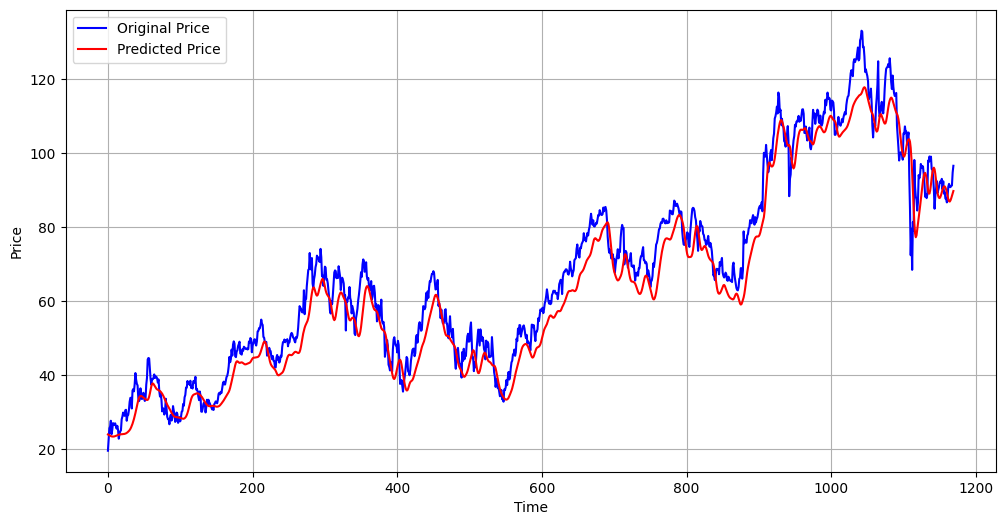

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 7.60%


In [42]:
#Calcukating R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.943411454473163


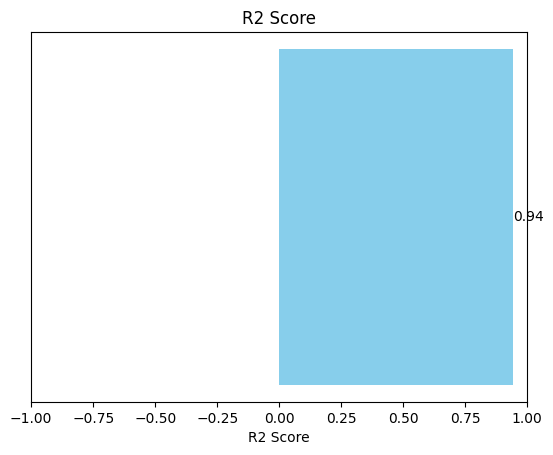

In [43]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

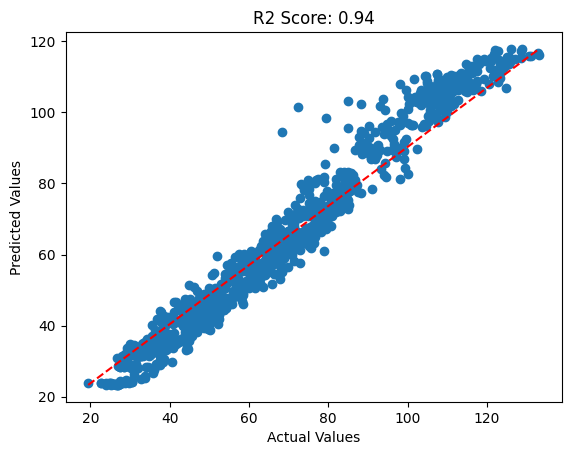

In [44]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()